### Colab Activity 21.4: Using a Neural Net for Non-Concentric Data

**Expected Time = 60 minutes** 


This activity focuses on using a neural network to classify a dataset that does not have an obvious linear boundary.  An important idea about the neural net is its ability to solve such problems with high accuracy.  The dataset you will use is created using Scikit-Learn, and is meant to mimic that from the videos.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings

from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


warnings.filterwarnings('ignore')

### The Data

Below, a dataset is manufactured to have four centers, and these are then combined to form a binary classification problem.  The data is created and visualized below using the `make_blobs` function.

In [2]:
X, y = make_blobs([50, 50, 50, 50], centers = [[0, 5], [5, 0], [5, 5], [0, 0]],
                 random_state=42)

In [3]:
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

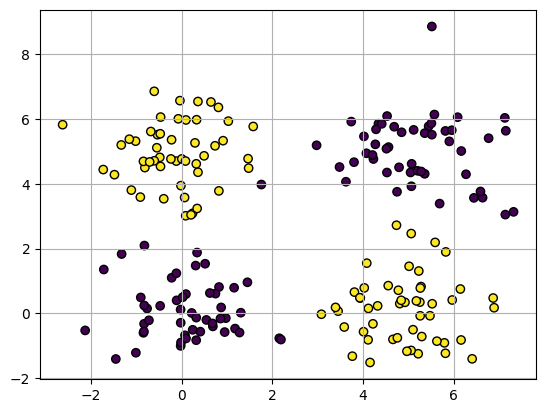

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'black')
plt.grid();

[Back to top](#-Index)

### Problem 1

#### The Network Architecture



First, use `keras` to create a `Sequential` model named `model` with a fully connected layer with 100 neurons and a `relu` activation function. The output layer of this model should have one neuron and a `sigmoid` activation function.

Next, compile this model with the `bce` loss and with `metrics` equal to `acc`.

Finally, use the `fit()` method on `model` for training using the `X` and `y` data. For this step, use 100 epochs, set `verbose=0` to disables the output of training progress, and use `validation_split=0.2` to ansure 20% of the data is used for validation. Assign the trained model to the `history` variable below.

In [5]:

model = Sequential([
    Dense(100, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.2)



### ANSWER CHECK
print(history.history['acc'][-1])

0.9750000238418579


[Back to top](#-Index)

### Problem 2

#### How many epochs are necessary



An important consideration is not wasting energy in over training your data.  Create a visualization of the loss function. Can you identify a point of diminishing returns?   

Assign your answer as an integer for what you believe is an optimal number of training  `epochs`. 

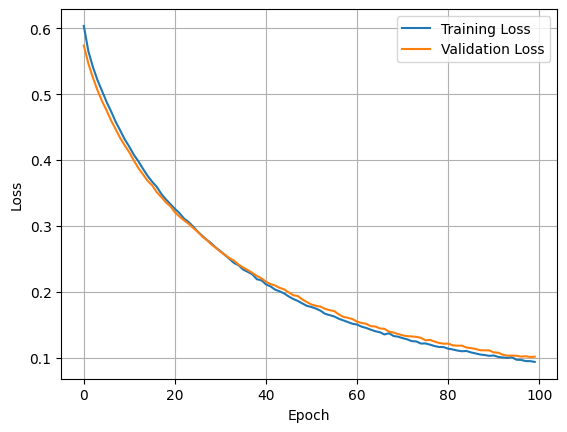

30


In [6]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

epochs = 30  # After examining the loss curves, around 30 epochs is sufficient


### ANSWER CHECK
print(epochs)

## Summary of Neural Network Classification Exercise

### Overview
This activity demonstrated the use of neural networks for classifying non-linearly separable data, specifically focusing on a dataset with non-concentric clusters.

### Exercise Components
1. **Data Generation**
   - Created synthetic data using `make_blobs` with 4 centers
   - Combined into binary classification problem
   - Visualized the non-linear nature of the data

2. **Neural Network Implementation**
   - Built a sequential model with:
     - Hidden layer: 100 neurons with ReLU activation
     - Output layer: Single neuron with sigmoid activation
   - Compiled using binary cross-entropy loss
   - Used 80/20 train/validation split

3. **Training Analysis**
   - Trained for 100 epochs
   - Analyzed loss curves to determine optimal training duration
   - Identified point of diminishing returns (~30 epochs)

### Key Takeaways
1. Neural networks can effectively handle non-linear classification problems
2. Architecture choices (layers, neurons, activation functions) are crucial for model performance
3. Monitoring training/validation loss helps identify optimal training duration
4. More epochs don't always mean better results - finding the point of diminishing returns is important
5. Validation split is essential for monitoring model generalization